[-11.26330077 -11.22389214 -11.11224744 -10.46753169  -9.97993653
  -9.90841476  -9.62962772  -9.52516278  -9.52086541  -9.5204189
  -9.01317048  -8.98403891  -8.91311121  -8.88722128  -8.73543437
  -8.60292016  -8.56498216  -8.36198058  -8.31052629  -8.29790143
  -8.29166121  -8.2756289   -8.21613484  -8.21023769  -8.16474914
  -8.16067065  -8.15068399  -7.99360017  -7.97634424  -7.93869644
  -7.9292249   -7.87223676  -7.82419987  -7.80746363  -7.74773557
  -7.7412022   -7.73096985  -7.66977168  -7.65036838  -7.6313398
  -7.60258737  -7.60037427  -7.56814231  -7.54366376  -7.50736152
  -7.49876599  -7.44035812  -7.43530287  -7.40593843  -7.39753818
  -7.3914356   -7.35380906  -7.33349726  -7.30616053  -7.30023224
  -7.29421495  -7.27843869  -7.27391852  -7.24300236  -7.21709858
  -7.18318965  -7.16783444  -7.15082457  -7.13219636  -7.10064722
  -7.06935683  -7.05430838  -7.05265145  -7.03803831  -6.99812012
  -6.99387159  -6.96141124  -6.95972116  -6.95624598  -6.94750587
  -6.9107628

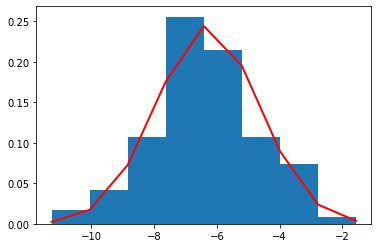

In [75]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import params

class ContDistrub:
    def __init__(self):
        self.type = None
        self.mean = None
        self.dispertion = None
        self.std = None
        self.mode = None
        self.median = None
        self.skewness = None #коэф асиметрии 
        self.kurtosis = None #коэф эксцесса
       
    def show(self):
        print("theoretical characteristics of", self.type,  end='\n')
        print("mean", self.mean, end='\n')
        print("disp", self.dispersion, end='\n')
        print("std", self.std, end='\n')
        print("moda: ", self.mode, end='\n')
        print("median: ", self.median, end='\n')
        print("skewness  :", self.skewness, end='\n' )
        print("kurtosis: ", self.kurtosis, end='\n\n')



class UniformContDistrub(ContDistrub):
    def __init__(self,a,b):
        self.type = "Uniform"
        self.mean = (a+b)/2 
        self.dispersion = (b-a)**2 / 12
        self.std = (b-a)/2/np.sqrt(3)
        self.mode = self.mean
        self.median = self.mean
        self.skewness = 0
        self.kurtosis = -6/5


class NormalContDistrub(ContDistrub):
    def __init__(self, a,sigma):
        self.type = "Normal"
        self.mean = a
        self.dispersion = sigma**2
        self.std = sigma
        self.mode = a
        self.median = a
        self.skewness = 0
        self.kurtosis = 0


class ExponentialContDistrub(ContDistrub):
    def __init__(self, lamb):
        self.type = "Exponential"
        self.mean = 1/lamb
        self.dispersion = 1/lamb/lamb
        self.std = self.mean
        self.mode = 0
        self.median = np.log(2)/lamb
        self.skewness = 2
        self.kurtosis = 6

def read_values_from_file(file):
    arr = np.loadtxt(file, dtype=float)
    return arr

def plot_hist_normal():
    count, bins, ignored = plt.hist(normal_distrub, count_intervals, density=True)
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - a)**2 / (2 * sigma**2) ),
         linewidth=2, color='r') 
    xs = np.zeros(len(bins))
    for i in range(1,len(bins)):
        xs[i-1] = (bins[i] + bins[i-1])/2

    return xs, bins

if __name__ == "__main__":
    
    theor_uniform_cont_distrub = UniformContDistrub(segment[0],segment[1])
    theor_normal_cont_distrub = NormalContDistrub(a, sigma)
    theor_exp_cont_distrub = ExponentialContDistrub(lamb)

    unform_distrub = read_values_from_file("uniform_distribution.txt")
    normal_distrub = read_values_from_file("normal_distribution.txt")
    exp_distrub = read_values_from_file("exponential_distribution.txt")
    
    #theor_uniform_cont_distrub.show()
    #theor_normal_cont_distrub.show()
    #theor_exp_cont_distrub.show()
    
    print(np.sort(normal_distrub))
    s = pd.Series(normal_distrub)
    xs, bins = plot_hist_normal()
    res = s.groupby(pd.cut(s, bins=bins, right=True, include_lowest=True)).size()
    print(sum(res))

164.99821254958607